## EDA on Haberman's Survival Data Set
### Intro 
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
#Read the dataset
df=pd.read_csv("haberman.csv",names=["Age","op_year","axil_nodes","surv_status"])
df.head()

,Age,op_year,axil_nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Understanding the Dataset
Lets start by understanding the dataset and finding the issues in the dataset that may cause problems. 

In [29]:
#All numeric properties of the data set
df.describe()

,Age,op_year,axil_nodes,surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [30]:
#Info Regarding the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age            306 non-null int64
op_year        306 non-null int64
axil_nodes     306 non-null int64
surv_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [31]:
# Name of columns regarding the dataset 
df.columns

Index(['Age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')

In [32]:
#Data types of columns
df.dtypes

Age            int64
op_year        int64
axil_nodes     int64
surv_status    int64
dtype: object

In [33]:
# Individual value counts of each columns
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print("_"*50)

Age
52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: Age, dtype: int64
__________________________________________________
op_year
58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: op_year, dtype: int64
__________________________________________________
axil_nodes
0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28  

We can see that we cannot have categories for other columns apart from surv_status and also there are outliers in axil_nodes columns

In [34]:
# Wether there are null values or not?
df.isnull().sum()

Age            0
op_year        0
axil_nodes     0
surv_status    0
dtype: int64

In [35]:
# Find duplicated values
sum(df.duplicated())

17

## Summary
### Dataset Details
1. The shape of data set is it has 306 rows and 4 columns
2. The columns are 
    1. Age : ItAge of patient at time of operation (numerical)
    2. op_year : Patient's year of operation (year - 1900, numerical)
    3. axil_nodes : Number of positive axillary nodes detected (numerical)
    4. surv_status : Survival status (class attribute)
        * 1 = the patient survived 5 years or longer
        * 2 = the patient died within 5 year
3. They are all numerical type values 
4. There are no Null values so the data has all the information
5. there are 17 duplicate values which need to be deleted
6. We can see that the gived dataset is imbalanced as there are more number of rows for patients survived longer.

### Issues 
1. We need to delete all the duplicate values 
2. Change the surv_status columns datatype to category rather than numerical so as it can be easy druing modeling and understanding
3. change the values in surv_status from 1 and 2 to >=5 and <5 respectively.
4. We need to take care of the OUTLIERS
5. We need to SMOTE values into the data set to make teh dataset into balanced format so that we dont have any bias while modeling (Out of the scope of this notebook)


## Cleaning and Adjusting the dataset 
Lets clean the isuues mentioned abouve and adjust the data for next step

In [36]:
# Drop duplicate values 
df.drop_duplicates(inplace=True)

In [37]:
# Check the Duplicates
sum(df.duplicated())

0

In [38]:
#Change the values of surv_status columns
df['surv_status'] = df['surv_status'].replace(1, '>=5')
df['surv_status'] = df['surv_status'].replace(2, '<5')

In [41]:
# Verify the data
df.head()

,Age,op_year,axil_nodes,surv_status
0,30,64,1,>=5
1,30,62,3,>=5
2,30,65,0,>=5
3,31,59,2,>=5
4,31,65,4,>=5


In [40]:
#convert the datatype of surv_status from object to category
df['surv_status'] = df['surv_status'].astype("category")

In [42]:
#Verify the data types
df.dtypes

Age               int64
op_year           int64
axil_nodes        int64
surv_status    category
dtype: object

### Add a columns for age as category using cut for more insights 
We can create a seperate column of age with 10 intervals as base which can help us get the idea of which age ggroup has more data and other properties.

In [43]:
bins = [29,40,50,60,70,80,90]
labels = ["30-40","40-50","50-60","60-70","70-80","80-90"]
df["age_cat"] = pd.cut(df["Age"],bins=bins,labels=labels)
df

,Age,op_year,axil_nodes,surv_status,age_cat
0,30,64,1,>=5,30-40
1,30,62,3,>=5,30-40
2,30,65,0,>=5,30-40
3,31,59,2,>=5,30-40
4,31,65,4,>=5,30-40
...,...,...,...,...,...
301,75,62,1,>=5,70-80
302,76,67,0,>=5,70-80
303,77,65,3,>=5,70-80
304,78,65,1,<5,70-80


### Outliers

In [122]:
df.dtypes

Age               int64
op_year           int64
axil_nodes        int64
surv_status    category
age_cat        category
dtype: object

In [61]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age           16.0
op_year        6.0
axil_nodes     5.0
dtype: float64


In [100]:
df1=df[["Age","op_year","axil_nodes"]]
df1.reset_index(drop=True)

,Age,op_year,axil_nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
...,...,...,...
284,75,62,1
285,76,67,0
286,77,65,3
287,78,65,1


In [111]:
# Outliers 
print(len(df1[((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]))

34


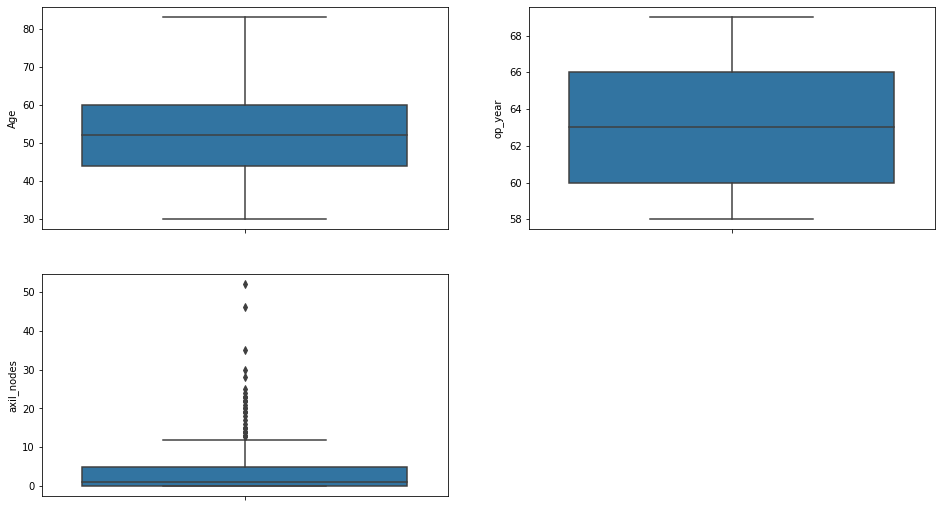

In [119]:
plt.figure(figsize=(16,9))
for i,col in zip(range(1,4),["Age","op_year","axil_nodes"]):
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col])

### Verify all the above details 

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 305
Data columns (total 5 columns):
Age            289 non-null int64
op_year        289 non-null int64
axil_nodes     289 non-null int64
surv_status    289 non-null category
age_cat        289 non-null category
dtypes: category(2), int64(3)
memory usage: 9.9 KB


In [121]:
df.dtypes

Age               int64
op_year           int64
axil_nodes        int64
surv_status    category
age_cat        category
dtype: object

## Summary 
### Dataset Details After Cleaning
1. The shape of data set is it has 289 rows and 5 columns
2. The columns are 
    1. Age : Age of patient at time of operation (numerical)
    2. op_year : Patient's year of operation (year - 1900, numerical)
    3. axil_nodes : Number of positive axillary nodes detected (numerical)
    4. surv_status : Survival status (category)
        * ">=5" = the patient survived 5 years or longer
        * "<5" = the patient died within 5 year
    5. age_cat : Age in 10 intervals (category)
3. As we can see that we have 34 outliers and all are from axil_nodes columns if we have to create a model we need to take care of that too (out of scope of this Notebook).

## Visualizations and Insights
Lets do some UNI-Variante and Multi-Variante analysis and visualization

### Uni-Variante Analysis
#### For Numerical varibale we will have 
1. Box Plot
2. Violin Plot
3. PDF(Dist Plot)
4. CDF
5. Line Plot
6. Bar Plot

#### For Categorical varibale we will have 
1. Count Plot

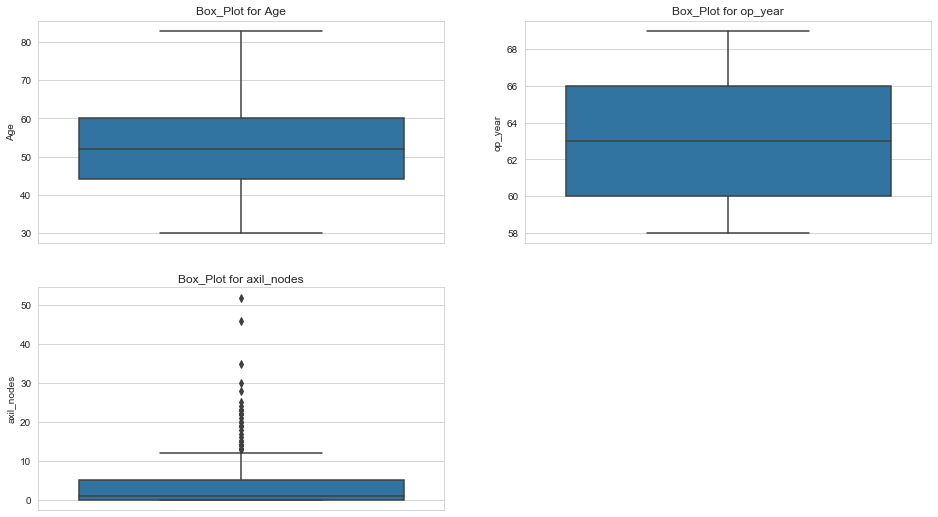

In [171]:
# Boxplot of numerical columns
plt.figure(figsize=(16,9))
sns.set_style('whitegrid')
for i,col in zip(range(1,4),["Age","op_year","axil_nodes"]):
    ax=plt.subplot(2,2,i)
    sns.boxplot(y=df[col])
    ax.set_title("Box_Plot for "+col)

We can see that there are outliers in the axil_nodes columns and the other 2 are in IQR range 

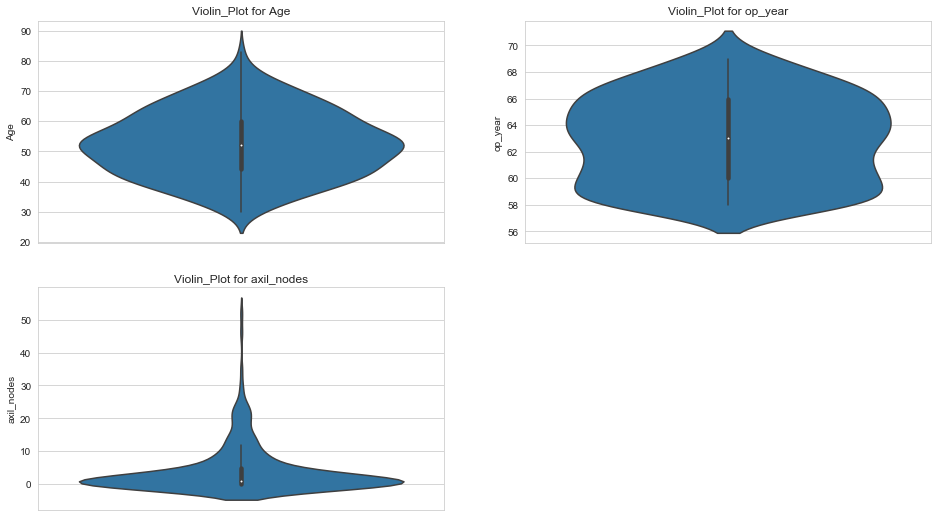

In [172]:
# Violinplot of numerical columns
plt.figure(figsize=(16,9))
sns.set_style('whitegrid')
for i,col in zip(range(1,4),["Age","op_year","axil_nodes"]):
    ax=plt.subplot(2,2,i)
    sns.violinplot(y=df[col])
    ax.set_title("Violin_Plot for "+col)

Here part from Boxplot we can also see that op_year Column is actually a bimodal data 

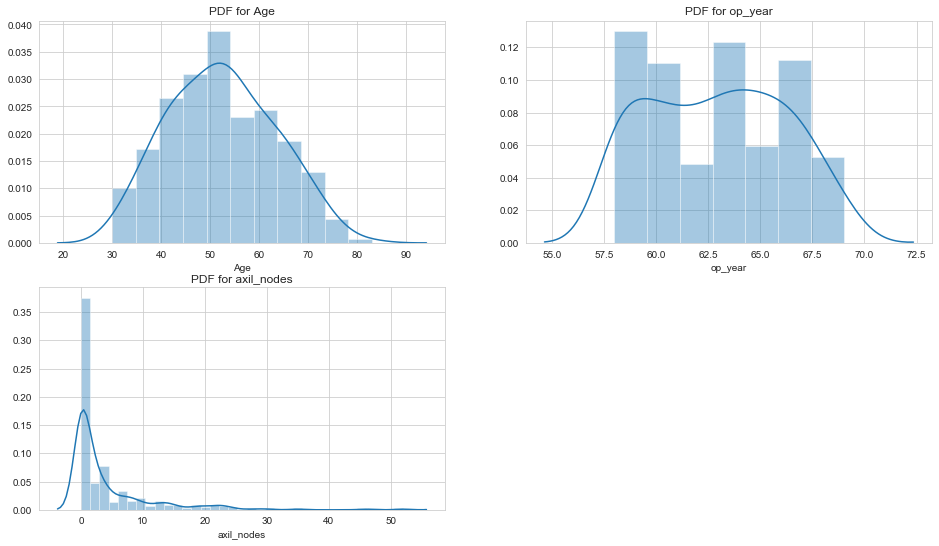

In [173]:
# PDF of numerical columns
plt.figure(figsize=(16,9))
sns.set_style('whitegrid')
for i,col in zip(range(1,4),["Age","op_year","axil_nodes"]):
    ax=plt.subplot(2,2,i)
    sns.distplot(df[col])
    ax.set_title("PDF for "+col)

Here we csn see that the age column is normally distributed and would be easy to interpret but as for the op_year and axil_nodes we need to use methods to simplyfy them as one is a bimodal kind and the other is right skewed due to outliers.

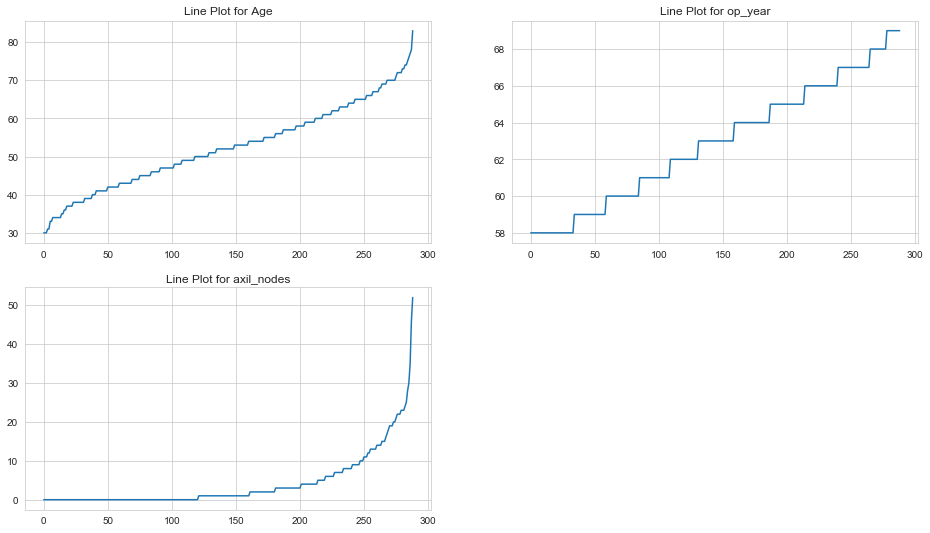

In [174]:
# LIne Plot of numerical columns
plt.figure(figsize=(16,9))
sns.set_style('whitegrid')
for i,col in zip(range(1,4),["Age","op_year","axil_nodes"]):
    ax=plt.subplot(2,2,i)
    plt.plot(sorted(df[col]))
    ax.set_title("Line Plot for "+col)

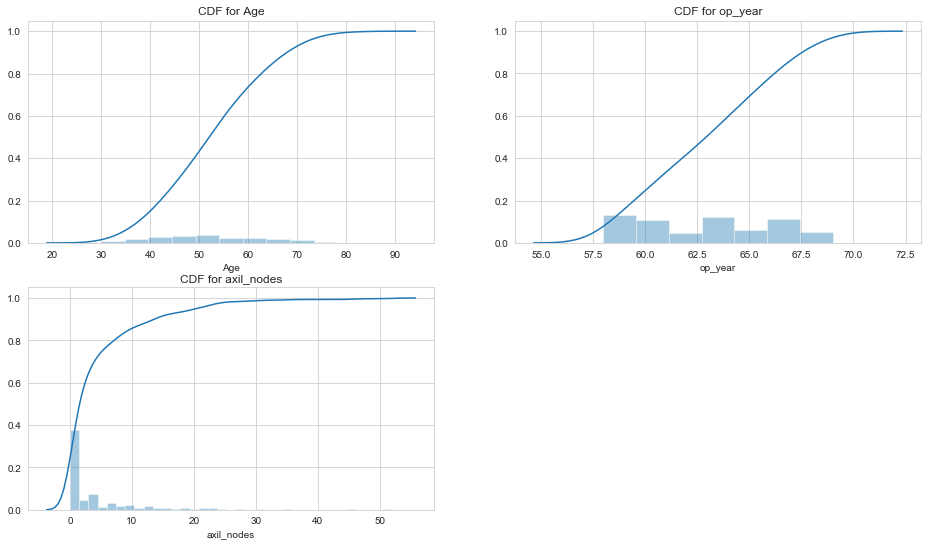

In [175]:
#CDF
plt.figure(figsize=(16,9))
sns.set_style('whitegrid')
k_kwargs = {'cumulative': True}
h_kwargs = {'density': True}
for i,col in zip(range(1,4),["Age","op_year","axil_nodes"]):
    ax=plt.subplot(2,2,i)
    sns.distplot(df[col], hist_kws=h_kwargs, kde_kws=k_kwargs)
    ax.set_title("CDF for "+col)

Here we can see the overall distribution of the variable and see that the axil_nodes is not distributed uniformly and the mean for that is around 250 and for others it is around 150.

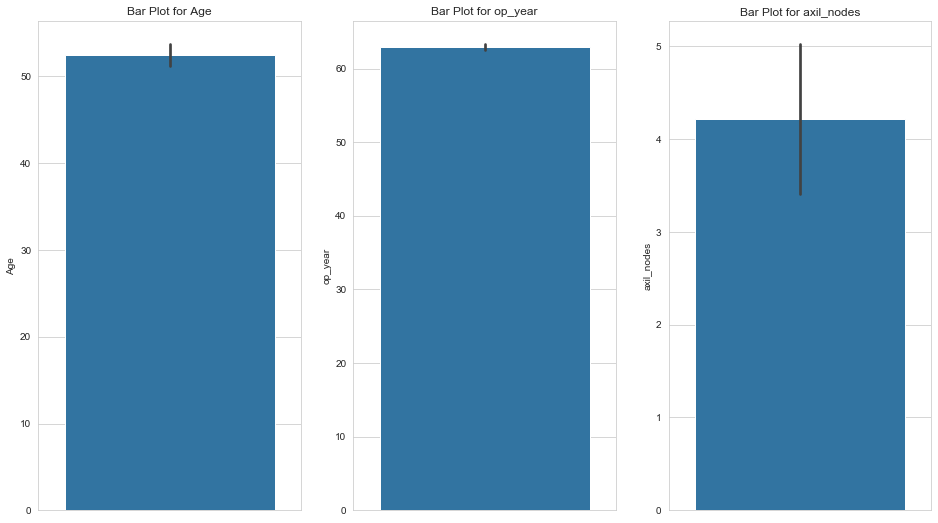

In [176]:
# Barplot of numerical columns
plt.figure(figsize=(16,9))
sns.set_style('whitegrid')
for i,col in zip(range(1,4),["Age","op_year","axil_nodes"]):
    ax=plt.subplot(1,3,i)
    sns.barplot(y=df[col])
    ax.set_title("Bar Plot for "+col)

From here we can see that for op_year the data has heighest value and also less deviation and the axil plot have least value with heighest deviation which is due to many outliers

In [139]:
df.columns

Index(['Age', 'op_year', 'axil_nodes', 'surv_status', 'age_cat'], dtype='object')

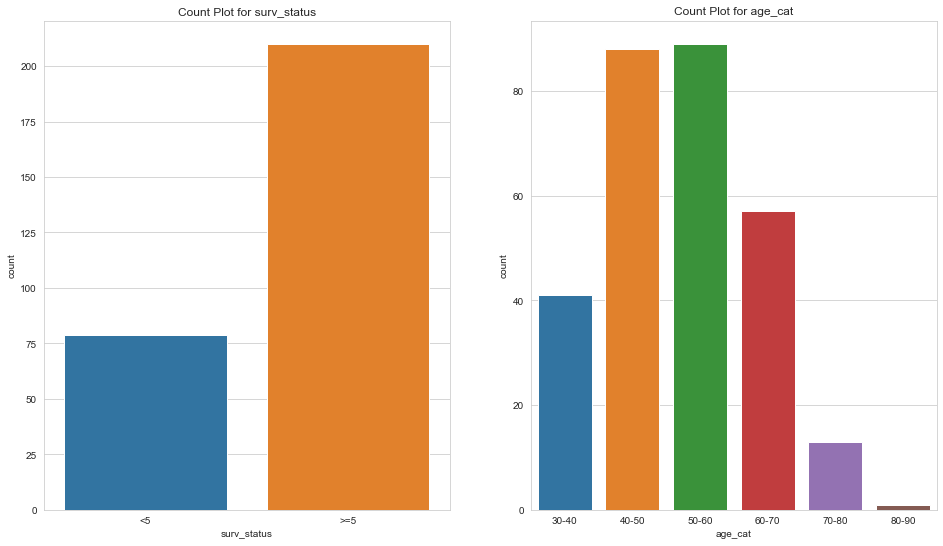

In [177]:
#Count Plot for Categorial variables
plt.figure(figsize=(16,9))
sns.set_style('whitegrid')
for i,col in zip(range(1,3),['surv_status', 'age_cat']):
    ax=plt.subplot(1,2,i)
    sns.countplot(df[col])
    ax.set_title("Count Plot for "+col)

Here we can see that for surv_status the data is imbalanced and around 3 times of the people more who are >=5 years have died when compared with the <5 years.<br/>
For age_cat we can see that the age group between 40 to 60 have died than others.

### Bi-Variante Ananlysis 

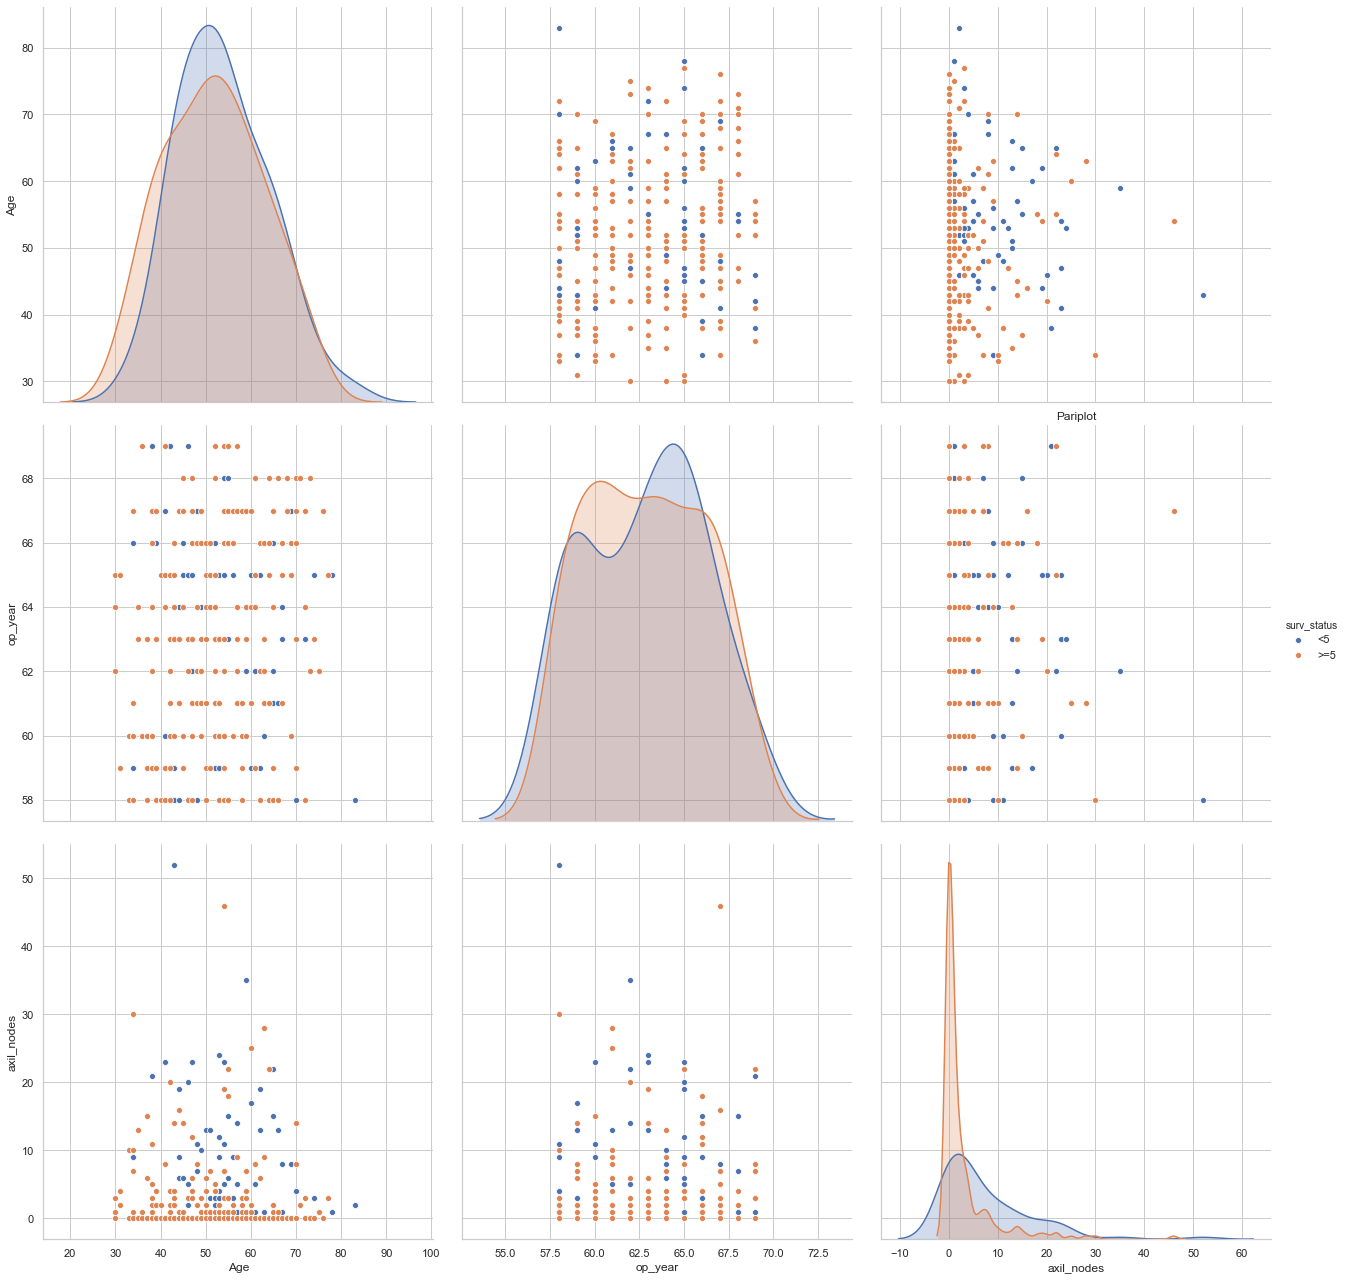

In [196]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style('whitegrid')
sns.pairplot(df,hue="surv_status",height=6)
plt.title("Pariplot");

In [186]:
df.corr()

,Age,op_year,axil_nodes
Age,1.000000,0.088329,-0.061317
op_year,0.088329,1.000000,-0.004923
axil_nodes,-0.061317,-0.004923,1.000000


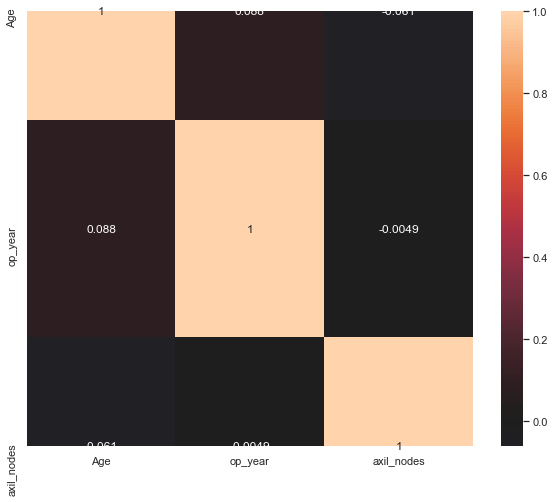

In [185]:
sns.heatmap(df.corr(),annot=True,center=0)

From the above Pairplot and Heatmap we can say that each one is not related to other that much so we cam use linear models for classification and but from scatter plot we can see that classifying it would be hard with linear models.

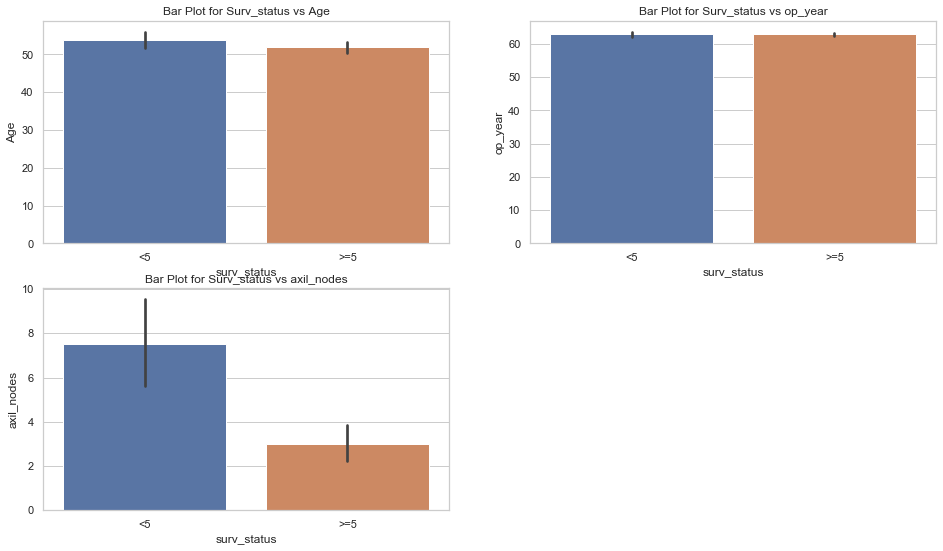

In [216]:
# Barplot for Surv_status vs other variables
plt.figure(figsize=(16,9))
sns.set_style('whitegrid')
for i,col in zip(range(1,4),["Age","op_year","axil_nodes"]):
    ax=plt.subplot(2,2,i)
    sns.barplot(data=df,y=col,x="surv_status")
    ax.set_title("Bar Plot for Surv_status vs "+col)

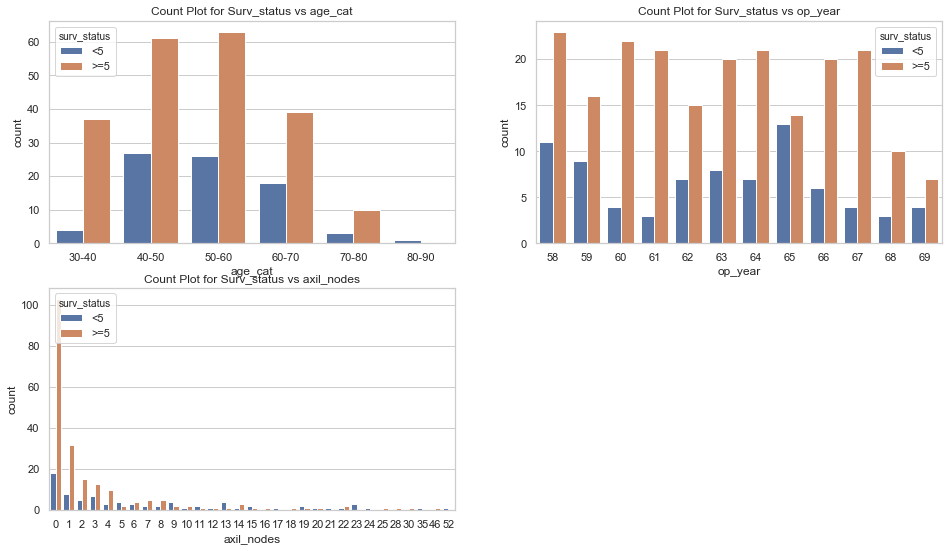

In [217]:
# barplot for Surv_status vs other variables
plt.figure(figsize=(16,9))
sns.set_style('whitegrid')
for i,col in zip(range(1,4),["age_cat","op_year","axil_nodes"]):
    ax=plt.subplot(2,2,i)
    sns.countplot(data=df,x=col,hue="surv_status")
    ax.set_title("Count Plot for Surv_status vs "+col)

From the above Plots we can say that as in every category people with >=5 have died when compared to the <5 buts as for the overall part op_year for both of them is around equal